<a href="https://colab.research.google.com/github/hsiaopat/NDBuildingRecognition/blob/main/BuildingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Special Studies Computer Vision Fall 2023
# University of Notre Dame
# Final Project
# _______________________________________________________________________________
# Patrick Hsiao and Anna Muller

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math
import random
from google.colab.patches import cv2_imshow
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
image_dir = '/content/drive/MyDrive/BuildingPhotos'

In [22]:
# Function to load and preprocess images
def load_and_preprocess(image_dir):
    images = []

    for file_name in os.listdir(image_dir):

      # Check if the file is an image
      if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):

        # Get the full path of the image file
        image_path = os.path.join(image_dir, file_name)

        # Read the image
        images.append(cv2.imread(image_path))
        preprocessed_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
    return images, preprocessed_images

In [18]:
# Function to compute keypoints and descriptors
def compute_keypoints_and_descriptors(images):
    sift = cv2.SIFT_create()
    keypoints_and_descriptors = [sift.detectAndCompute(img, None) for img in images]
    return keypoints_and_descriptors


In [19]:
# Function to match descriptors
def match_descriptors(descriptor1, descriptor2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptor1, descriptor2, k=2)
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]
    return good_matches

In [20]:
# Function to recognize buildings based on matches
def recognize_building(matches, threshold=10):
    return "Building Recognized" if len(matches) > threshold else "Building Not Recognized"


In [24]:

# Number of images for each building and weather setting
num_images_per_building = 50

# Load and preprocess images for sunny and cloudy settings for each building
data = []

for building_number in range(1, 6):
    sunny_folder = f'/content/drive/MyDrive/BuildingPhotos/building{building_number}_sunny'
    #cloudy_folder = f'/content/drive/MyDrive/BuildingPhotos/building{building_number}_cloudy'

    sunny_images, sunny_preprocessed = load_and_preprocess(sunny_folder)
    #cloudy_images, cloudy_preprocessed = load_and_preprocess(cloudy_folder, num_images_per_building)

    sunny_keypoints_and_descriptors = compute_keypoints_and_descriptors(sunny_preprocessed)
    #cloudy_keypoints_and_descriptors = compute_keypoints_and_descriptors(cloudy_preprocessed)



    # Randomly assign images to training, validation, and test sets
    #random.shuffle(sunny_keypoints_and_descriptors)
    #random.shuffle(cloudy_keypoints_and_descriptors)

    # Assuming an 80-10-10 split
   # train_split = int(0.8 * num_images_per_building)
   # val_split = int(0.1 * num_images_per_building)

    # Training set
    #train_data = sunny_keypoints_and_descriptors[:train_split] + cloudy_keypoints_and_descriptors[:train_split]

    # Validation set
    #val_data = sunny_keypoints_and_descriptors[train_split:train_split + val_split] + \
     #          cloudy_keypoints_and_descriptors[train_split:train_split + val_split]

    # Test set
    #test_data = sunny_keypoints_and_descriptors[train_split + val_split:] + \
    #            cloudy_keypoints_and_descriptors[train_split + val_split:]

   # data.append((train_data, val_data, test_data))


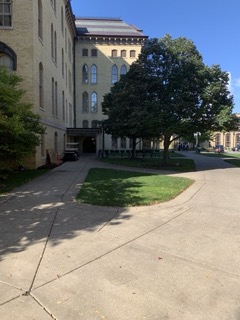

In [25]:
cv2_imshow(sunny_images[0])

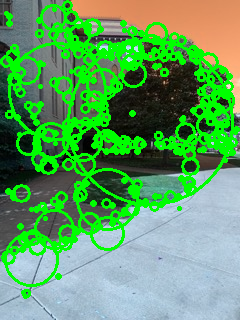

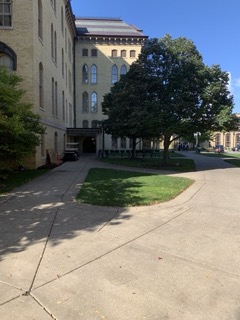

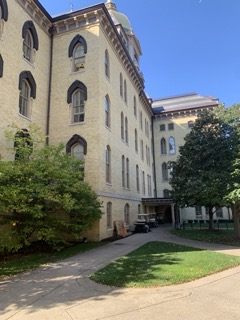

In [34]:
# Display keypoints on an image
image_with_keypoints = sunny_images[0].copy()

keypoints, _ = sunny_keypoints_and_descriptors[0]
for kp in keypoints:
    x, y = kp.pt
    size = int(kp.size)
    cv2.circle(image_with_keypoints, (int(x), int(y)), size, (0, 255, 0), 2)

# Convert BGR to RGB for cv2_imshow
image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

# Display the image with keypoints
cv2_imshow(image_with_keypoints_rgb)
cv2_imshow(sunny_images[0])
cv2_imshow(sunny_images[2])

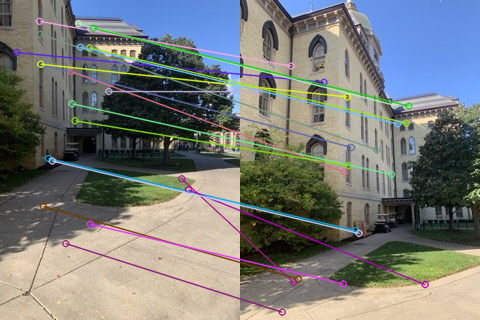

In [36]:
bf = cv2.BFMatcher(crossCheck=True)
matches_lm = bf.match(sunny_keypoints_and_descriptors[0][1], sunny_keypoints_and_descriptors[2][1])
matches_lm_sorted = sorted(matches_lm, key=lambda x: x.distance)
match_shape_lm = (sunny_images[0].shape[0] + sunny_images[2].shape[0], sunny_images[0].shape[1]+sunny_images[2].shape[1])
match_img_left_middle = np.zeros(match_shape_lm)
match_img_left_middle = cv2.drawMatches(sunny_images[0], sunny_keypoints_and_descriptors[0][0], sunny_images[2], sunny_keypoints_and_descriptors[2][0], matches_lm_sorted[:20], match_img_left_middle, flags=2)
cv2_imshow(match_img_left_middle)